# Import Libraries and Load Data

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from mpl_toolkits.basemap import Basemap
import folium
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

%matplotlib inline
sns.set_color_codes("pastel")

In [14]:
cancel_reason = ['Carrier','Weather','NAS','Security']

In [15]:
#Import all data
flights_df = pd.read_csv('2008.csv')
airports_df = pd.read_csv('airports.csv')
carriers_df = pd.read_csv('carriers.csv')

#Change case of column names
flights_df.columns = [column.lower() for column in flights_df.columns]

#Backup main data
df = flights_df.copy()

In [8]:
df.head(3)

,year,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,uniquecarrier,flightnum,...,taxiin,taxiout,cancelled,cancellationcode,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [9]:
df.columns

Index(['year', 'month', 'dayofmonth', 'dayofweek', 'deptime', 'crsdeptime',
       'arrtime', 'crsarrtime', 'uniquecarrier', 'flightnum', 'tailnum',
       'actualelapsedtime', 'crselapsedtime', 'airtime', 'arrdelay',
       'depdelay', 'origin', 'dest', 'distance', 'taxiin', 'taxiout',
       'cancelled', 'cancellationcode', 'diverted', 'carrierdelay',
       'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay'],
      dtype='object')

# Data Statistics

In [5]:
df.shape

(7009728, 29)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


In [8]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7009728.0,7.009728e+06,7.009728e+06,7.009728e+06,6.873482e+06,7.009728e+06,6.858079e+06,7.009728e+06,7.009728e+06,6.855029e+06,...,7.009728e+06,6.858079e+06,6.872670e+06,7.009728e+06,7.009728e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,2008.0,6.375130e+00,1.572801e+01,3.924182e+00,1.333830e+03,1.326086e+03,1.481258e+03,1.494801e+03,2.224200e+03,1.273224e+02,...,7.263870e+02,6.860852e+00,1.645305e+01,1.960618e-02,2.463006e-03,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,0.0,3.406737e+00,8.797068e+00,1.988259e+00,4.780689e+02,4.642509e+02,5.052251e+02,4.826728e+02,1.961716e+03,7.018731e+01,...,5.621018e+02,4.933649e+00,1.133280e+01,1.386426e-01,4.956753e-02,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,6.220000e+02,7.700000e+01,...,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.571000e+03,1.100000e+02,...,5.810000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,1.715000e+03,1.909000e+03,1.907000e+03,3.518000e+03,1.570000e+02,...,9.540000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.743000e+03,1.379000e+03,...,4.962000e+03,3.080000e+02,4.290000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [11]:
df.nunique()

Year                    1
Month                  12
DayofMonth             31
DayOfWeek               7
DepTime              1440
CRSDepTime           1217
ArrTime              1440
CRSArrTime           1378
UniqueCarrier          20
FlightNum            7539
TailNum              5373
ActualElapsedTime     689
CRSElapsedTime        525
AirTime               663
ArrDelay             1153
DepDelay             1134
Origin                303
Dest                  304
Distance             1435
TaxiIn                190
TaxiOut               342
Cancelled               2
CancellationCode        4
Diverted                2
CarrierDelay          984
WeatherDelay          599
NASDelay              574
SecurityDelay         156
LateAircraftDelay     564
dtype: int64

## Null Values

In [35]:
df.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               136246
CRSDepTime                 0
ArrTime               151649
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime     154699
CRSElapsedTime           844
AirTime               154699
ArrDelay              154699
DepDelay              136246
Origin                     0
Dest                       0
Distance                   0
TaxiIn                151649
TaxiOut               137058
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay         5484993
WeatherDelay         5484993
NASDelay             5484993
SecurityDelay        5484993
LateAircraftDelay    5484993
dtype: int64

In [53]:
#Confirm that missing time data (arrival/departure) is due to cancelled/diverted planes
df[(df.Cancelled==False) & (df.Diverted==False)].isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                    0
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    5
ActualElapsedTime          0
CRSElapsedTime             0
AirTime                    0
ArrDelay                   0
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     6855029
Diverted                   0
CarrierDelay         5330294
WeatherDelay         5330294
NASDelay             5330294
SecurityDelay        5330294
LateAircraftDelay    5330294
dtype: int64

## Issues to fix

<ul>
  <li>Change type of columns expressed in hours/minutes time object</li>
  <li>Change type of columns expressed in minutes to int</li>
  <li>Replace NaN values for time columns with 0</li>
  <li>Change type of cancelled,diverted columns to boolean</li>
  <li>Change cancellation code, unique carrier to categorical</li>
  <li>Drop Taxi Time related data</li>  
</ul>

# Data Wrangling 

## Drop unused data

### Fix

In [16]:
drop_columns = ['taxiin','taxiout','year','diverted','tailnum','actualelapsedtime','crselapsedtime']
df.drop(columns=drop_columns,inplace=True)

### Test

In [11]:
df.columns

Index(['month', 'dayofmonth', 'dayofweek', 'deptime', 'crsdeptime', 'arrtime',
       'crsarrtime', 'uniquecarrier', 'flightnum', 'airtime', 'arrdelay',
       'depdelay', 'origin', 'dest', 'distance', 'cancelled',
       'cancellationcode', 'carrierdelay', 'weatherdelay', 'nasdelay',
       'securitydelay', 'lateaircraftdelay'],
      dtype='object')

## Categorical variables

### Fix

In [17]:
df[['cancellationcode','uniquecarrier']] = df[['cancellationcode','uniquecarrier']].astype('category')

### Test

In [14]:
df.CancellationCode.unique()

[NaN, A, C, B, D]
Categories (4, object): [A, C, B, D]

In [14]:
df.uniquecarrier.unique()

[WN, XE, YV, OH, OO, ..., AA, AQ, AS, B6, CO]
Length: 20
Categories (20, object): [WN, XE, YV, OH, ..., AQ, AS, B6, CO]

## Boolean variables

### Fix

In [18]:
df[['cancelled']] = df[['cancelled']].astype('bool')

### Test

In [21]:
df.Cancelled.dtype

dtype('bool')

## Null Values

### Fix

In [19]:
time_columns = df.columns[(df.columns.str.contains('time'))|(df.columns.str.contains('delay'))]
print(time_columns)
df[time_columns] = df[time_columns].fillna(0)

Index(['deptime', 'crsdeptime', 'arrtime', 'crsarrtime', 'airtime', 'arrdelay',
       'depdelay', 'carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay',
       'lateaircraftdelay'],
      dtype='object')


### Test

In [65]:
df.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                    0
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime          0
CRSElapsedTime             0
AirTime                    0
ArrDelay                   0
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
dtype: int64

## Time variables

### Fix

In [20]:
#Make all columns integers
df[time_columns] = df[time_columns].astype(int)

In [21]:
#select the columns in HH:MM format
time_columns = time_columns[:4]
time_columns 

Index(['deptime', 'crsdeptime', 'arrtime', 'crsarrtime'], dtype='object')

In [22]:
#In order to convert column to type ensure all hours are between 0 and 23 and all minutes are between 0 and 59
#Do this for all columns
for column in time_columns:
    print(df[df[column] > 2359][column].unique())
    print(df[df[column] % 100 > 59][column].unique())

[2400]
[]
[]
[]
[2400]
[]
[2400]
[]


In [23]:
#Replace the values and convert
for column in time_columns:
    df[column].replace(2400,0,inplace=True)
    df[column] = df[column].apply(lambda x: datetime.time(int(x/100), x%100))

### Test

In [16]:
df[time_columns].dtypes

DepTime       object
CRSDepTime    object
ArrTime       object
CRSArrTime    object
dtype: object

In [34]:
df[time_columns].head(10)

,deptime,crsdeptime,arrtime,crsarrtime
0,20:03:00,19:55:00,22:11:00,22:25:00
1,07:54:00,07:35:00,10:02:00,10:00:00
2,06:28:00,06:20:00,08:04:00,07:50:00
3,09:26:00,09:30:00,10:54:00,11:00:00
4,18:29:00,17:55:00,19:59:00,19:25:00
5,19:40:00,19:15:00,21:21:00,21:10:00
6,19:37:00,18:30:00,20:37:00,19:40:00
7,10:39:00,10:40:00,11:32:00,11:50:00
8,06:17:00,06:15:00,06:52:00,06:50:00
9,16:20:00,16:20:00,16:39:00,16:55:00


In [24]:
flights_df = df.copy()
#df.to_csv('flights_clean.csv')

# Exploratory Analysis

In [15]:
df.head(3)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Dest,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,20:03:00,19:55:00,22:11:00,22:25:00,WN,335,...,TPA,810,False,NaN,False,0,0,0,0,0
1,2008,1,3,4,07:54:00,07:35:00,10:02:00,10:00:00,WN,3231,...,TPA,810,False,NaN,False,0,0,0,0,0
2,2008,1,3,4,06:28:00,06:20:00,08:04:00,07:50:00,WN,448,...,BWI,515,False,NaN,False,0,0,0,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 27 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              object
CRSDepTime           object
ArrTime              object
CRSArrTime           object
UniqueCarrier        category
FlightNum            int64
TailNum              object
ActualElapsedTime    int32
CRSElapsedTime       int32
AirTime              int32
ArrDelay             int32
DepDelay             int32
Origin               object
Dest                 object
Distance             int64
Cancelled            bool
CancellationCode     category
Diverted             bool
CarrierDelay         int32
WeatherDelay         int32
NASDelay             int32
SecurityDelay        int32
LateAircraftDelay    int32
dtypes: bool(2), category(2), int32(10), int64(6), object(7)
memory usage: 989.4+ MB


In [18]:
df.Origin.nunique()

303

In [19]:
df.Dest.nunique()

304

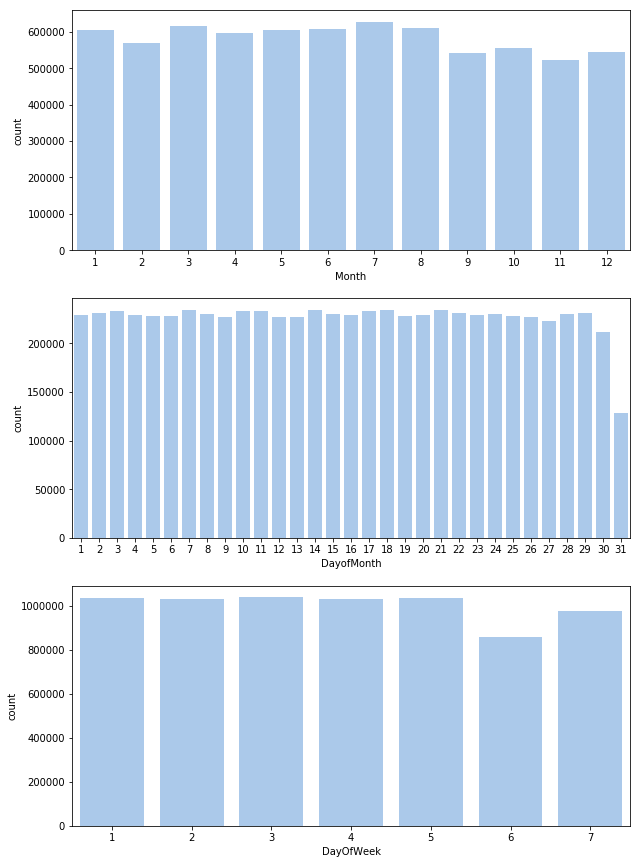

In [14]:
#Check distribution of flights per Day of week/month and month
#Expectation is that the values are aproximately close (with the exception of the 31st day of the month)
#Any major deviation will be investigated
variables = ['Month','DayofMonth','DayOfWeek']
fig,axes = plt.subplots(ncols = 1, nrows = 3, figsize = (10,15))
for variable,ax in zip(variables,axes):
    sns.countplot(data = df, x = variable,color = 'b', ax = ax);

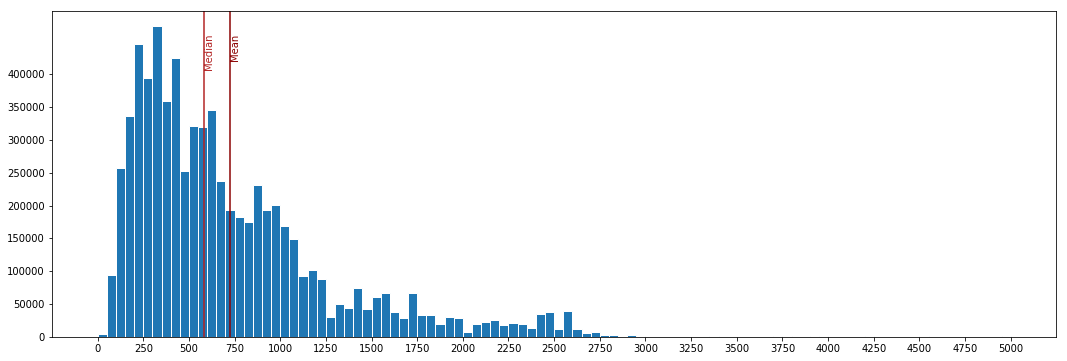

In [15]:
bin_size = 50
bins = np.arange(0,df.Distance.max()+bin_size,bin_size)
fig,ax = plt.subplots(figsize=(18,6))
plt.xticks(bins[::5])
plt.yticks(np.arange(0,450000,50000))
plt.axvline(x=df.Distance.median(),color = '#B22222')
plt.text(df.Distance.median(),450000,'Median',rotation='vertical',color='#B22222')
plt.axvline(x=df.Distance.mean(),color = '#8B0000')
plt.text(df.Distance.mean(),450000,'Mean',rotation='vertical',color='#8B0000')
plt.hist(data=df, x = 'Distance',bins = bins,edgecolor = 'w');

In [39]:
df.Distance.describe()[-5:]

min      11.0
25%     325.0
50%     581.0
75%     954.0
max    4962.0
Name: Distance, dtype: float64

In [42]:
df[df.Distance < 100][['Origin','Dest']]

,Origin,Dest
94778,SAN,ONT
96148,SAT,AUS
97290,ONT,SAN
97321,ONT,SAN
102740,BPT,IAH
102861,DTW,CLE
102980,DTW,CLE
103018,IAH,BPT
103417,IAH,BPT
103441,BPT,IAH


## Cancellations

In [12]:
df = pd.read_csv('flights_clean.csv')

In [25]:
dfcancel = df.drop(columns=['arrtime','crsarrtime','airtime', 'arrdelay',
       'depdelay','carrierdelay', 'weatherdelay', 'nasdelay',
       'securitydelay', 'lateaircraftdelay'])
dfcancel.head(3)

,month,dayofmonth,dayofweek,deptime,crsdeptime,uniquecarrier,flightnum,origin,dest,distance,cancelled,cancellationcode
0,1,3,4,20:03:00,19:55:00,WN,335,IAD,TPA,810,False,NaN
1,1,3,4,07:54:00,07:35:00,WN,3231,IAD,TPA,810,False,NaN
2,1,3,4,06:28:00,06:20:00,WN,448,IND,BWI,515,False,NaN


### Carriers with the highest percentage of cancellations

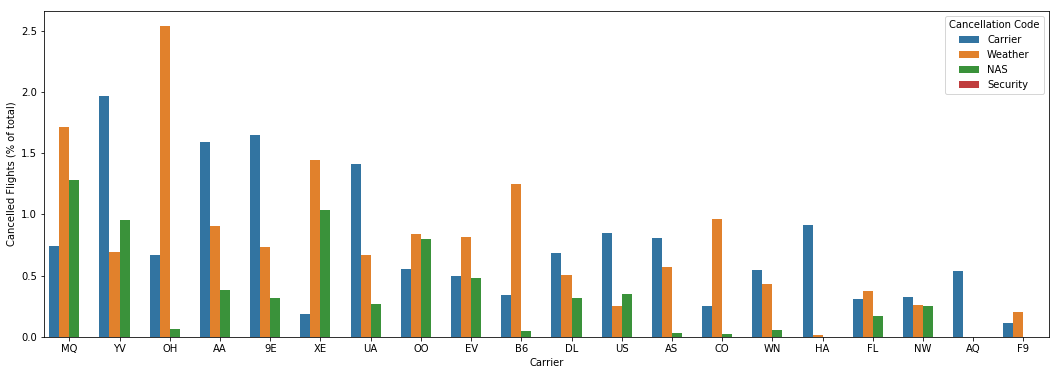

In [26]:
#Get number of cancelled flights per carrier
carr_cancel = dfcancel.groupby(['uniquecarrier','cancellationcode']).cancelled.sum().reset_index()

#Get number of flights per carrier
carr_flights = dfcancel.groupby('uniquecarrier').flightnum.count().reset_index()

#Left join the results to compute the cancellation rates
df_cancel = pd.merge(carr_cancel,carr_flights,on='uniquecarrier',how = 'left')
df_cancel['cancelrate'] = df_cancel.cancelled / df_cancel.flightnum * 100

#Determine the order in which to show the carriers in the graph
carrier_order = df_cancel.groupby('uniquecarrier').cancelrate.sum().sort_values(ascending=False).index.values

#Draw the barplot 
fig, ax = plt.subplots(figsize=(18,6))
sns.barplot(data = df_cancel, x = 'uniquecarrier', y = 'cancelrate', hue = 'cancellationcode', order = carrier_order, ax = ax)
#workaround to show the legend with colors otherwise it's all black
h, l = ax.get_legend_handles_labels()
ax.legend(h, cancel_reason, title = 'Cancellation Code', loc = 'upper right')
plt.ylabel('Cancelled Flights (% of total)')
plt.xlabel('Carrier');

### Carriers with highest rate of cancellation due their own fault

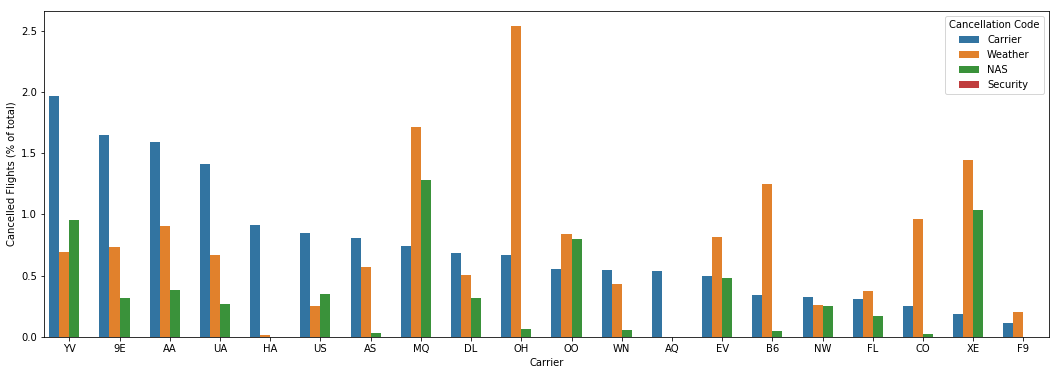

In [27]:
#Determine the order in which to show the carriers in the graph
carrier_order = df_cancel[df_cancel['cancellationcode']=='A'].groupby('uniquecarrier').cancelrate.sum().sort_values(ascending=False).index.values

#Draw the barplot 
fig, ax = plt.subplots(figsize=(18,6))
sns.barplot(data = df_cancel, x = 'uniquecarrier', y = 'cancelrate', hue = 'cancellationcode', order = carrier_order, ax = ax)
#workaround to show the legend with colors otherwise it's all black
h, l = ax.get_legend_handles_labels()
ax.legend(h, cancel_reason, title = 'Cancellation Code', loc = 'upper right')
plt.ylabel('Cancelled Flights (% of total)')
plt.xlabel('Carrier');

### Carriers with highest number of cancellation due their own fault

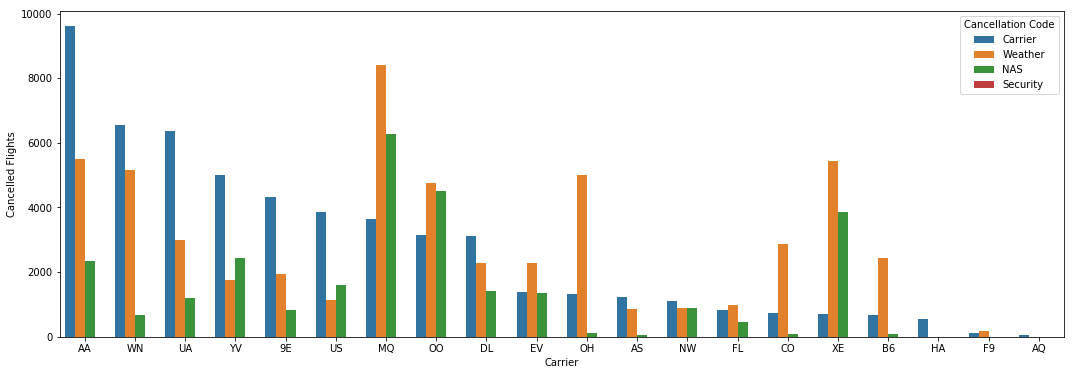

In [28]:
#Determine the order in which to show the carriers in the graph
carrier_order = df_cancel[df_cancel['cancellationcode']=='A'].groupby('uniquecarrier').cancelled.sum().sort_values(ascending=False).index.values

#Draw the barplot 
fig, ax = plt.subplots(figsize=(18,6))
sns.barplot(data = df_cancel, x = 'uniquecarrier', y = 'cancelled', hue = 'cancellationcode', order = carrier_order, ax = ax)
#workaround to show the legend with colors otherwise it's all black
h, l = ax.get_legend_handles_labels()
ax.legend(h, cancel_reason, title = 'Cancellation Code', loc = 'upper right')
plt.ylabel('Cancelled Flights')
plt.xlabel('Carrier');

### Airports with the highest rate of cancellations

In [29]:
df_cancel_origin = pd.concat(
    [df[df.cancellationcode == 'B'].groupby(['origin']).origin.count(),
     df.groupby(['origin']).origin.count()],
    axis = 1, sort = True)
df_cancel_origin.columns = ['cancellations','total']
df_cancel_origin.cancellations.fillna(0)
df_cancel_origin['cancelrate'] = df_cancel_origin.cancellations / df_cancel_origin.total * 100
df_cancel_origin.sort_values(by='cancelrate',ascending=False,inplace=True)
df_cancel_origin.reset_index(inplace=True)
df_cancel_origin.rename(index=str, columns={'index':'iata'},inplace=True)
df_cancel_origin = pd.merge(df_cancel_origin,airports_df,on='iata',how='left')
df_cancel_origin.head(20)

,iata,cancellations,total,cancelrate,airport,city,state,country,lat,long
0,TEX,27.0,194,13.917526,Telluride Regional,Telluride,CO,USA,37.953759,-107.908480
1,ASE,408.0,5307,7.687959,Aspen-Pitkin Co/Sardy,Aspen,CO,USA,39.223160,-106.868845
2,SUN,152.0,2871,5.294323,Friedman Memorial,Hailey,ID,USA,43.504841,-114.296590
3,ADK,5.0,102,4.901961,Adak,Adak,AK,USA,51.877964,-176.646031
4,ADQ,33.0,706,4.674221,Kodiak,Kodiak,AK,USA,57.749968,-152.493855
5,ALO,15.0,323,4.643963,Waterloo Municipal,Waterloo,IA,USA,42.557081,-92.400344
6,ITH,6.0,132,4.545455,Tompkins Cty,Ithaca,NY,USA,42.491028,-76.458444
7,ACK,20.0,457,4.376368,Nantucket Memorial,Nantucket,MA,USA,41.253052,-70.060181
8,DBQ,58.0,1349,4.299481,Dubuque Municipal,Dubuque,IA,USA,42.402959,-90.709167
9,LCH,36.0,1000,3.600000,Lake Charles Regional,Lake Charles,LA,USA,30.126097,-93.223404


In [30]:
@interact_manual

def show_map (Selected_Airports = (5,df_cancel_origin.iata.nunique(),5),
             Aggregation_Criteria = ['Number_of_Cancellations','Cancellation_Rate']):
    criteria = 'cancelrate'
    multiplier = 10000
    if Aggregation_Criteria == 'Number_of_Cancellations':
        criteria = 'cancellations'
        multiplier = 25
    df_cancel_origin.sort_values(by=criteria,ascending=False,inplace=True)
    df_cancel_origin.reset_index(drop=True,inplace=True)
    m = folium.Map(location=[35,-92], tiles = 'Mapbox Bright', zoom_start=4)
    for i in range(0,Selected_Airports):
        popup_text = df_cancel_origin.airport[i]+': '+str(df_cancel_origin[criteria][i])
        popup = folium.Popup(popup_text,parse_html=True)
        folium.Circle(
            location = [df_cancel_origin.iloc[i]['lat'],df_cancel_origin.iloc[i]['long']],
            radius = df_cancel_origin.iloc[i][criteria]*multiplier,
            color = 'crimson',
            weight = 1,
            opacity = 0.5,
            fill= True,
            fill_color = 'crimson',
            popup=popup).add_to(m)
    display(m)

interactive(children=(IntSlider(value=150, description='Selected_Airports', max=303, min=5, step=5), Dropdown(…

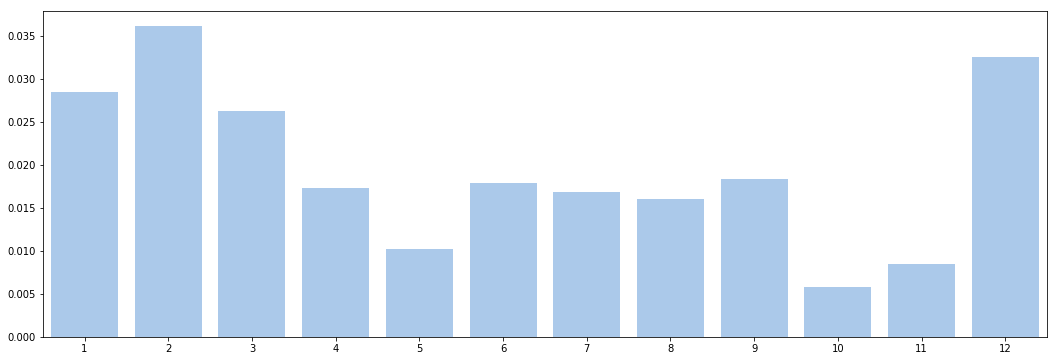

In [31]:
fig, ax = plt.subplots(figsize=(18,6))
values_cancel = dfcancel[dfcancel.cancelled].groupby('month').sum().cancelled.values
values_total = dfcancel.groupby('month').count().flightnum.values
labels = [x+1 for x in list(range(12))]
sns.set_color_codes('pastel')
sns.barplot(y=values_cancel/values_total,x=labels,ax=ax,label='Total',color='b')
#sns.barplot(y=values_total,x=labels,ax=ax,label='Total',color='b')
#sns.set_color_codes("muted")
#sns.barplot(y=values_cancel,x=labels, ax = ax,label='Cancelled',color='b');

In [58]:
dfcancel.head(2)

,month,dayofmonth,dayofweek,deptime,crsdeptime,uniquecarrier,flightnum,origin,dest,distance,cancelled,cancellationcode
0,1,3,4,20:03:00,19:55:00,WN,335,IAD,TPA,810,False,NaN
1,1,3,4,07:54:00,07:35:00,WN,3231,IAD,TPA,810,False,NaN


In [64]:
dfcancel['hourofday'] = [x.hour for x in dfcancel.deptime]
bins = [0,6,12,18,24]
labels = ['night','morning','afternoon','evening']
dfcancel['daystage'] = pd.cut(dfcancel.hourofday,bins,labels=labels)

In [68]:
dfcancel.head(10)

,month,dayofmonth,dayofweek,deptime,crsdeptime,uniquecarrier,flightnum,origin,dest,distance,cancelled,cancellationcode,hourofday,daystage
0,1,3,4,20:03:00,19:55:00,WN,335,IAD,TPA,810,False,NaN,20,evening
1,1,3,4,07:54:00,07:35:00,WN,3231,IAD,TPA,810,False,NaN,7,morning
2,1,3,4,06:28:00,06:20:00,WN,448,IND,BWI,515,False,NaN,6,night
3,1,3,4,09:26:00,09:30:00,WN,1746,IND,BWI,515,False,NaN,9,morning
4,1,3,4,18:29:00,17:55:00,WN,3920,IND,BWI,515,False,NaN,18,afternoon
5,1,3,4,19:40:00,19:15:00,WN,378,IND,JAX,688,False,NaN,19,evening
6,1,3,4,19:37:00,18:30:00,WN,509,IND,LAS,1591,False,NaN,19,evening
7,1,3,4,10:39:00,10:40:00,WN,535,IND,LAS,1591,False,NaN,10,morning
8,1,3,4,06:17:00,06:15:00,WN,11,IND,MCI,451,False,NaN,6,night
9,1,3,4,16:20:00,16:20:00,WN,810,IND,MCI,451,False,NaN,16,afternoon


## Delays

In [39]:
df.head(5)

,month,dayofmonth,dayofweek,deptime,arrtime,uniquecarrier,flightnum,airtime,arrdelay,depdelay,origin,dest,distance,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
0,1,3,4,20:03:00,22:11:00,WN,335,116,-14,8,IAD,TPA,810,0,0,0,0,0
1,1,3,4,07:54:00,10:02:00,WN,3231,113,2,19,IAD,TPA,810,0,0,0,0,0
2,1,3,4,06:28:00,08:04:00,WN,448,76,14,8,IND,BWI,515,0,0,0,0,0
3,1,3,4,09:26:00,10:54:00,WN,1746,78,-6,-4,IND,BWI,515,0,0,0,0,0
4,1,3,4,18:29:00,19:59:00,WN,3920,77,34,34,IND,BWI,515,2,0,0,0,32


In [33]:
df.columns

Index(['month', 'dayofmonth', 'dayofweek', 'deptime', 'crsdeptime', 'arrtime',
       'crsarrtime', 'uniquecarrier', 'flightnum', 'airtime', 'arrdelay',
       'depdelay', 'origin', 'dest', 'distance', 'cancelled',
       'cancellationcode', 'carrierdelay', 'weatherdelay', 'nasdelay',
       'securitydelay', 'lateaircraftdelay'],
      dtype='object')

In [36]:
dfdelay = df.drop(columns=['cancelled','cancellationcode','crsdeptime','crsarrtime'], inplace=True) 

KeyError: "['cancelled' 'cancellationcode'] not found in axis"

### Air Companies with highest average rate of delay

In [45]:
dfdelay=df.copy()

In [46]:
#Get number of cancelled flights per carrier
carr_delay = dfdelay.groupby('uniquecarrier').carrierdelay.avg().reset_index()

#Get number of flights per carrier
carr_flights = dfdelay.groupby('uniquecarrier').flightnum.count().reset_index()

#Left join the results to compute the cancellation rates
df_delay = pd.merge(carr_delay,carr_flights,on='uniquecarrier',how = 'left')
df_delay['avg'] = df_cancel.cancelled / df_cancel.flightnum * 100

#Determine the order in which to show the carriers in the graph
carrier_order = df_cancel.groupby('uniquecarrier').cancelrate.sum().sort_values(ascending=False).index.values

uniquecarrier
9E     908509
AA    2821907
AQ       8727
AS     481833
B6     677621
CO     996161
DL    1411220
EV    1688969
F9     250971
FL     443708
HA     184855
MQ    1705271
NW    1478247
OH    1075766
OO    1678216
UA    1720150
US    1109335
WN    2261002
XE    1218009
YV    1927740
Name: carrierdelay, dtype: int32

In [51]:
dfdelay.groupby('uniquecarrier').carrierdelay.mean().reset_index().sort_values(ascending=False,by='carrierdelay')

,uniquecarrier,carrierdelay
19,YV,7.561841
7,EV,6.019670
13,OH,5.443967
1,AA,4.665196
12,NW,4.252088
15,UA,3.826680
11,MQ,3.475230
0,9E,3.464841
4,B6,3.455646
5,CO,3.337726


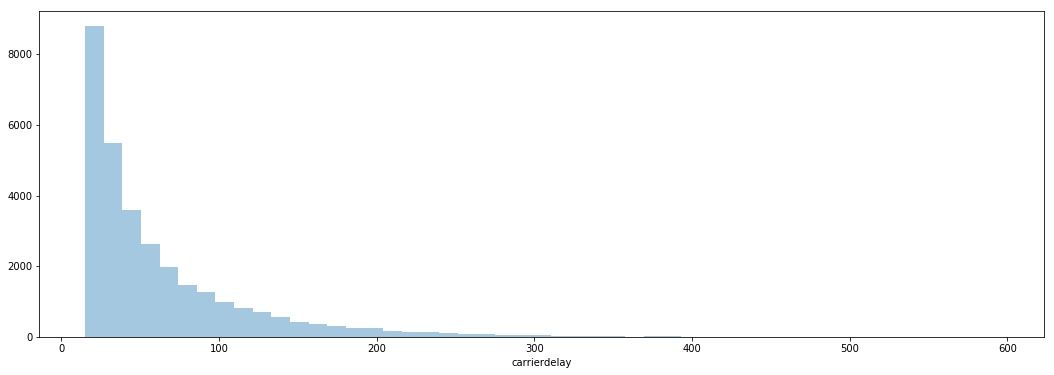

In [64]:
mindelay = dfdelay[(dfdelay.uniquecarrier == 'YV') & (dfdelay.carrierdelay!=0)].carrierdelay.min()
maxdelay = dfdelay[(dfdelay.uniquecarrier == 'YV') & (dfdelay.carrierdelay!=0)].carrierdelay.max()
steps = 50
bins = np.arange(mindelay,maxdelay,(maxdelay-mindelay)/steps)

fig, ax = plt.subplots(figsize=(18,6))
sns.distplot(dfdelay[(dfdelay.uniquecarrier == 'YV') & (dfdelay.carrierdelay!=0)].carrierdelay, kde=False, bins=bins, ax=ax);

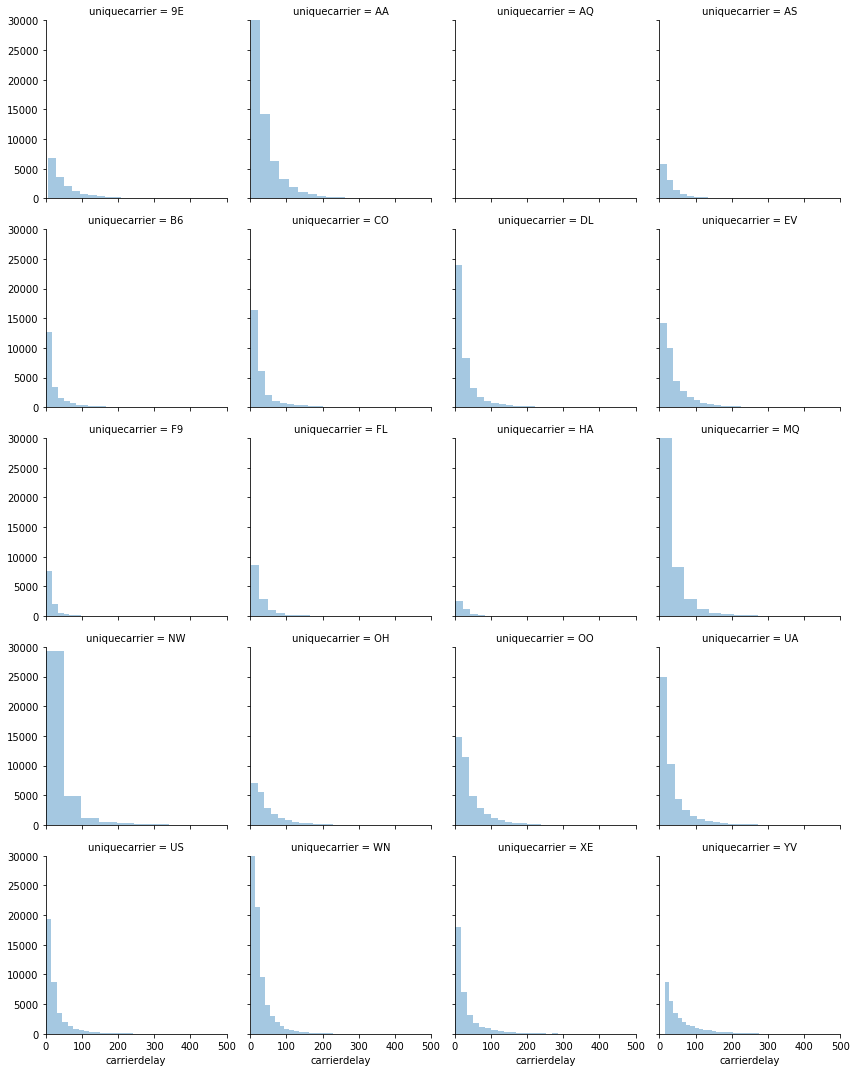

In [79]:
g = sns.FacetGrid(data = dfdelay[(dfdelay.carrierdelay!=0)], col = 'uniquecarrier', col_wrap = 4, height = 3,xlim=(0,500),ylim=(0,30000))
g.map(sns.distplot, 'carrierdelay', kde = False)

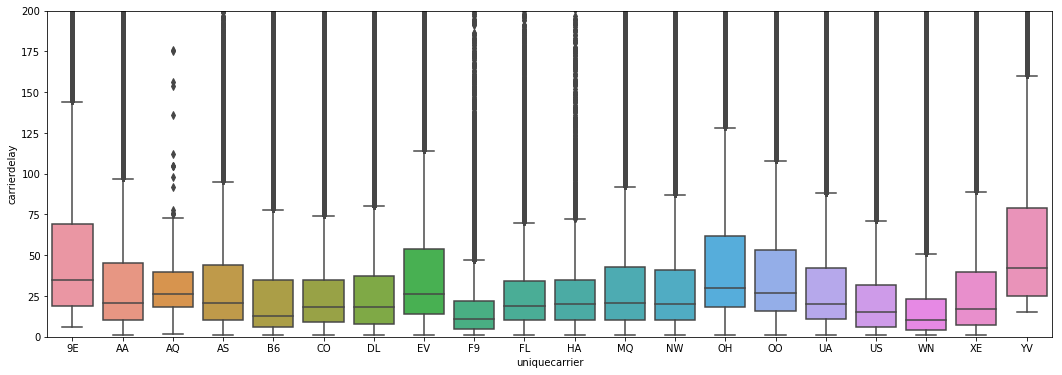

In [87]:
fig, ax = plt.subplots(figsize=(18,6))
ax.set_ylim([0,200])
sns.boxplot(data = dfdelay[(dfdelay.carrierdelay!=0)], y = 'carrierdelay', x = 'uniquecarrier', ax = ax);

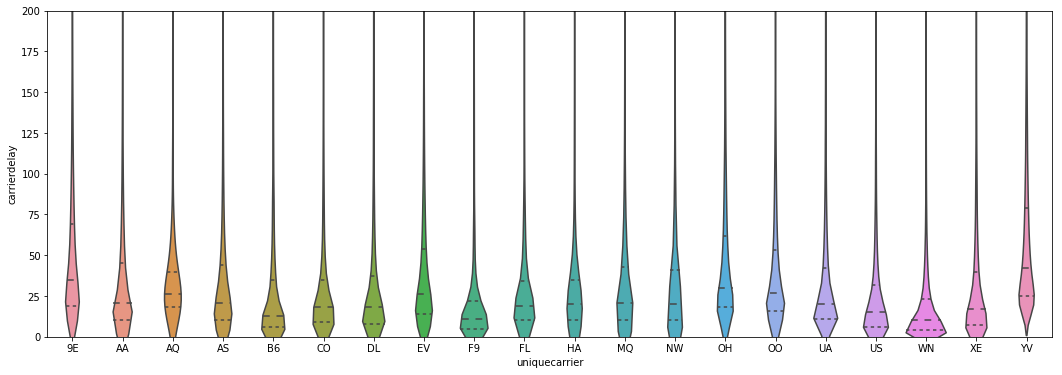

In [89]:
fig, ax = plt.subplots(figsize=(18,6))
ax.set_ylim([0,200])
sns.violinplot(data = dfdelay[(dfdelay.carrierdelay!=0)], y = 'carrierdelay', x = 'uniquecarrier', ax = ax, inner = 'quartile');

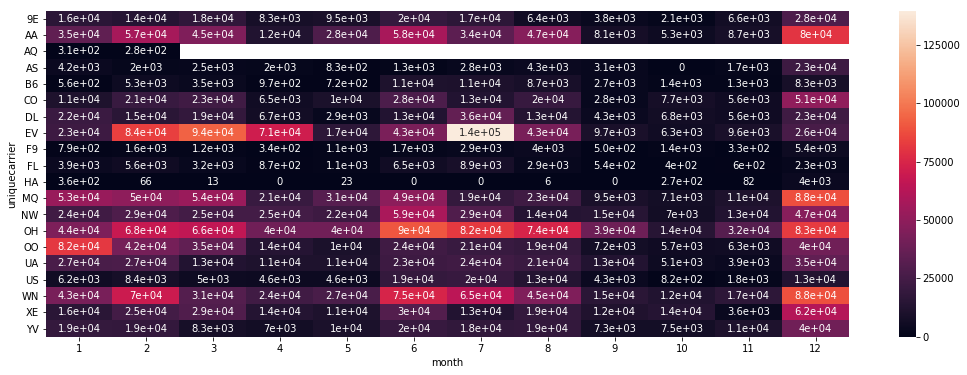

In [97]:
testdf = dfdelay.groupby(['uniquecarrier','month']).weatherdelay.sum().reset_index(name='weatherdelay')
testdf = testdf.pivot(index = 'uniquecarrier', columns = 'month', values = 'weatherdelay')
testdf

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(testdf, annot = True, ax = ax)

In [99]:
dfdelay.columns

Index(['month', 'dayofmonth', 'dayofweek', 'deptime', 'arrtime',
       'uniquecarrier', 'flightnum', 'airtime', 'arrdelay', 'depdelay',
       'origin', 'dest', 'distance', 'carrierdelay', 'weatherdelay',
       'nasdelay', 'securitydelay', 'lateaircraftdelay'],
      dtype='object')

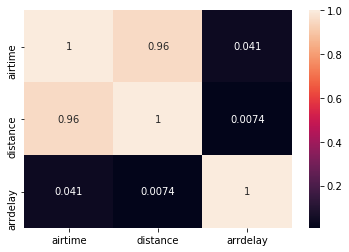

In [104]:
sns.heatmap(dfdelay[['airtime','distance','arrdelay']].corr(),annot = True);

In [105]:
g = sns.Pairgrid(data = dfdelay, vars = ['airtime','distance','arrdelay'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

AttributeError: module 'seaborn' has no attribute 'Pairgrid'